In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

#### Bildinformationen plus Einlesung

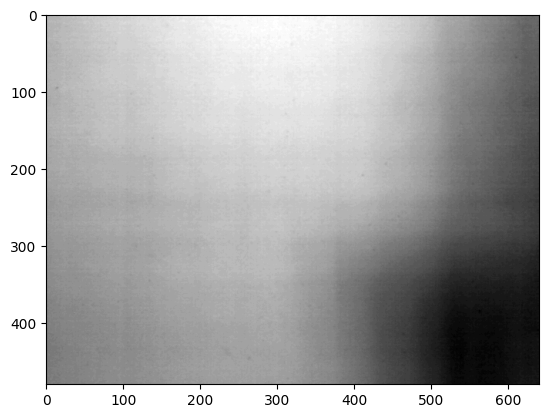

In [50]:
# List all image files in the directory
file_list = glob.glob('./weiss/*.png')

# Check if there are any files
if not file_list:
    print("No images found in the specified directory.")
    exit()

# Load images
images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in file_list]

# Check if any images failed to load
for idx, image in enumerate(images):
    if image is None:
        print(f'Image {idx + 1} could not be loaded: {file_list[idx]}')

# Convert images to float64 for accurate calculations
images = [image.astype(np.float64) for image in images]

# Compute the average pixel-wise value across all images
average_image = np.mean(images, axis=0).astype(np.uint8)

# Save the resulting average image
cv2.imwrite('./ergebnis/avr_weiss.png', average_image)

plt.imshow(average_image, cmap='gray')
plt.show()

### Color spliter

In [42]:
def readGrayScales(img):
    white = img[0:450,   0:80]
    gray1 = img[0:450, 110:220]
    gray2 = img[0:450, 250:380]
    gray3 = img[0:450, 400:520]
    black = img[0:450, 540:630]
    return (white, gray1, gray2, gray3, black)

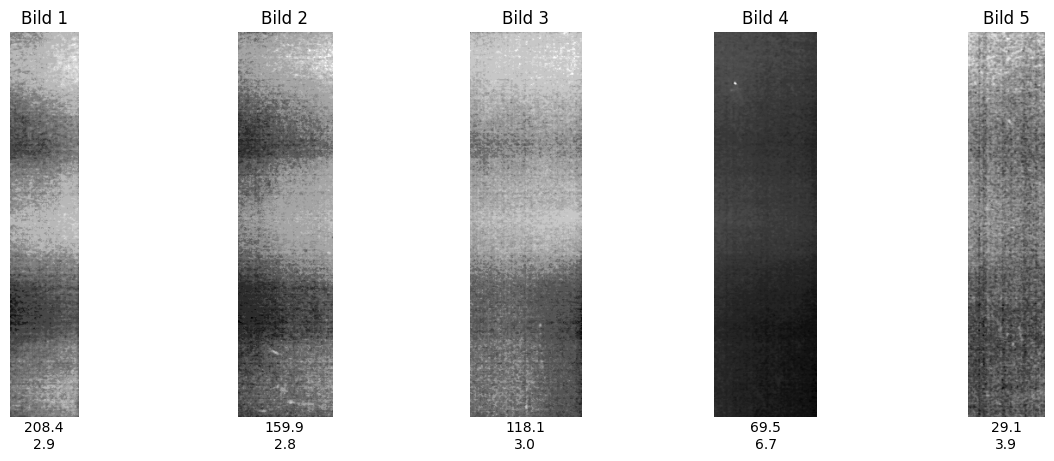

In [43]:

# Pfad zum Grauwertkeilbild
grauwertkeil_pfad = './grau/Grauwertkeil.png'

# Bild laden
grauwertkeil = cv2.imread(grauwertkeil_pfad, cv2.IMREAD_GRAYSCALE)

if grauwertkeil is None:
    raise(f'Das Bild konnte nicht geladen werden: {grauwertkeil_pfad}')

grau_bilder = readGrayScales(grauwertkeil)
# Anzahl der Bilder in der Liste
num_images = len(grau_bilder)

fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # Adjust figsize as needed

for idx, (bild, ax) in enumerate(zip(grau_bilder, axes)):
    ax.imshow(bild, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Bild {idx + 1}')

    # Add label to the image
    ax.text(0.5, -0.05, f'{round(np.mean(bild), 1)}\n{round(np.std(bild), 1)}', transform=ax.transAxes,
            fontsize=10, ha='center', va='center')

plt.show()

#### Aufgabe2: Pixelweiser Mittelwert + Am ende in ein Bild zusammenfügen. Plus korrigiertes Bild 

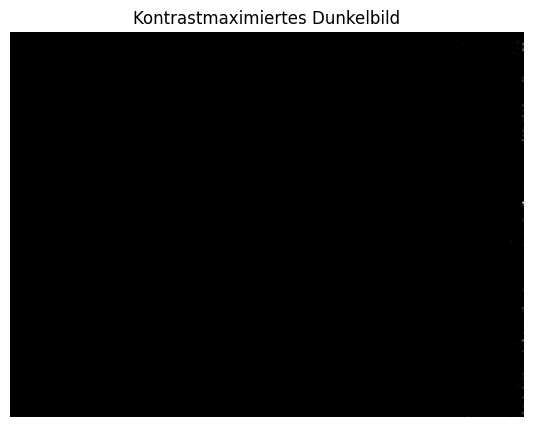

In [44]:
dateien = glob.glob('./schwarz/*.png')

# Sortieren der Dateien, um sicherzustellen, dass sie in der richtigen Reihenfolge geladen werden
dateien.sort()

# Bilderliste initialisieren
images = []

# Jedes Bild laden und zur Liste hinzufügen
for idx, datei in enumerate(dateien):
    image = cv2.imread(datei, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f'Bild {idx+1} konnte nicht geladen werden: {datei}')
        continue
    images.append(image.astype(np.float64))  # Konvertieren zu double

# Pixelweisen Mittelwert über alle Bilder berechnen, um das Dunkelbild zu erhalten
dark_image = np.mean(images, axis=0)

cv2.imwrite('./ergebnis/avr_schwarzbild.png', dark_image)

# Kontrastmaximierung des Dunkelbildes
min_value = np.min(dark_image)
max_value = np.max(dark_image)
# Calculate contrast-enhanced dark frame
if min_value == max_value:
    # Handle the case where min and max values are the same to avoid division by zero
    kontrastmaximiertes_bild = dark_image.astype(np.uint8)
else:
    kontrastmaximiertes_bild = 255 * (dark_image - min_value) / (max_value - min_value)
    kontrastmaximiertes_bild = kontrastmaximiertes_bild.astype(np.uint8)


# Dunkelbild kontrastmaximiert darstellen
plt.figure(figsize=(15, 5))
plt.imshow(kontrastmaximiertes_bild, cmap='gray')
plt.axis('off')
plt.title('Kontrastmaximiertes Dunkelbild')
plt.show()

#### AUfgabe 3: Weißbilder plus Mittelwert deren, Danach minus Darkimage von gerade eben

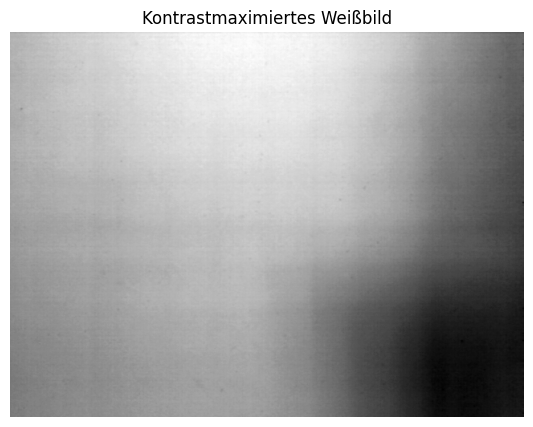

In [45]:
# Muster für die Weißbilddateien
weiss_dateien = glob.glob('./weiss/*.png')

# sortieren für richtige reihenfolge
weiss_dateien.sort()

# Liste für die Weißbilder initialisieren
weiss_images = []

# Jedes Weißbild laden und zur Liste hinzufügen
for datei in weiss_dateien:
    image = cv2.imread(datei, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f'Datei konnte nicht geladen werden: {datei}')
        continue
    weiss_images.append(image.astype(np.float64))  # Konvertieren in double

# Pixelweisen Mittelwert über alle Weißbilder berechnen
weiss_image_mean = np.mean(weiss_images, axis=0)
# Vom Mittelwertbild das Dunkelbild subtrahieren
weiss_image_corrected = cv2.subtract(weiss_image_mean, dark_image)

# Das korrigierte Weißbild normieren, so dass sein Mittelwert 1 ist
weiss_image_normalized = weiss_image_corrected / np.mean(weiss_image_corrected)

# Weißbild speichern
cv2.imwrite('./ergebnis/cor_weiss.png', weiss_image_corrected)

# Kontrastmaximierung des Weißbildes
min_value = np.min(weiss_image_corrected)
max_value = np.max(weiss_image_corrected)
kontrastmaximiertes_weissbild = 255 * (weiss_image_corrected - min_value) / (max_value - min_value)
kontrastmaximiertes_weissbild = kontrastmaximiertes_weissbild.astype(np.uint8)

# Weißbild anzeigen
plt.figure(figsize=(15, 5))
plt.imshow(kontrastmaximiertes_weissbild, cmap='gray')
plt.axis('off')
plt.title('Kontrastmaximiertes Weißbild')
plt.show()

In [46]:
def korrigiere_bild_mit_weissbild(eingabebild_pfad, weissbild_pfad, dunkelbild_pfad, korrigiertes_bild_pfad):
    # Eingabebild, Weißbild und Dunkelbild einlesen
    eingabebild = cv2.imread(eingabebild_pfad, cv2.IMREAD_GRAYSCALE).astype(np.float64)
    weissbild = cv2.imread(weissbild_pfad, cv2.IMREAD_GRAYSCALE).astype(np.float64)
    dunkelbild = cv2.imread(dunkelbild_pfad, cv2.IMREAD_GRAYSCALE).astype(np.float64)
    
    # Normierung des Weißbildes
    weissbild /= np.mean(weissbild)

    # Korrektur des Eingabebildes
    eingabebild_korrigiert = (eingabebild - dunkelbild) / weissbild

    # Umwandlung in uint8 für die Speicherung
    eingabebild_korrigiert_uint8 = np.clip(eingabebild_korrigiert, 0, 255).astype(np.uint8)

    # Korrigiertes Bild speichern
    cv2.imwrite(korrigiertes_bild_pfad, eingabebild_korrigiert_uint8)

#### Aufgabe 4: Korrigieren des Keils plus Korrigierte Tabelle

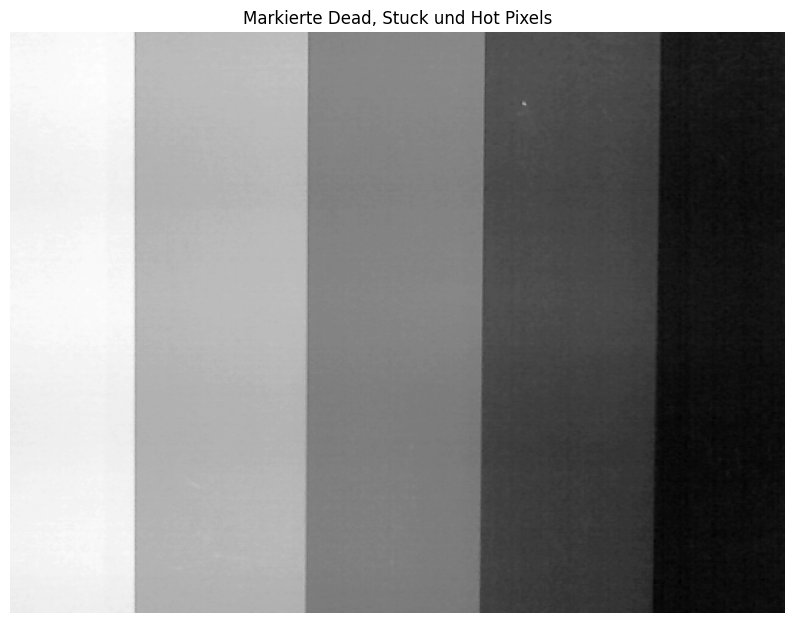

In [47]:
grauwertkeil_pfad = './grau/Grauwertkeil.png'
dunkelbild_pfad = './ergebnis/avr_schwarzbild.png'
weissbild_pfad = './ergebnis/avr_weiss.png'

# Bilder laden
grauwertkeil = cv2.imread(grauwertkeil_pfad, cv2.IMREAD_GRAYSCALE).astype(np.float64)
dunkelbild = cv2.imread(dunkelbild_pfad, cv2.IMREAD_GRAYSCALE).astype(np.float64)
weissbild = cv2.imread(weissbild_pfad, cv2.IMREAD_GRAYSCALE).astype(np.float64)

# Identifiziere fehlerhafte Pixel im Weißbild (Dead Pixels)
dead_pixels = np.where(weissbild < 10)

# Identifiziere fehlerhafte Pixel im Dunkelbild (Stuck und Hot Pixels)
stuck_hot_pixels = np.where(dunkelbild > 245)

# Erstelle eine Kopie des Grauwertkeils zur Markierung der fehlerhaften Pixel
markiertes_grauwertkeil = grauwertkeil.copy()

# Markiere die fehlerhaften Pixel
for x, y in zip(*dead_pixels):
    markiertes_grauwertkeil[x, y] = 255

for x, y in zip(*stuck_hot_pixels):
    markiertes_grauwertkeil[x, y] = 255

# Zeige das markierte Bild
plt.figure(figsize=(10, 10))
plt.imshow(markiertes_grauwertkeil, cmap='gray')
plt.axis('off')
plt.title('Markierte Dead, Stuck und Hot Pixels')
plt.show()

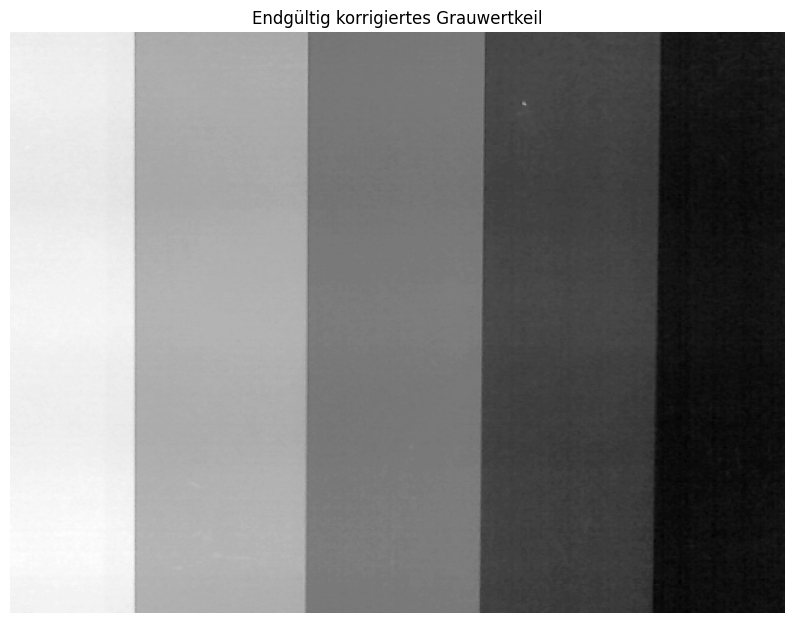

In [48]:
# Speichere das korrigierte grauwertkeil
cv2.imwrite('grauwertkeil_pixelkorrigiert.png', grauwertkeil)

# korrigiere den keil mit aufgabe 3
korrigiere_bild_mit_weissbild('./grau/Grauwertkeil.png', weissbild_pfad, dunkelbild_pfad, './ergebnis/grauwertkeil_final.png')

grauwertkeilfinal = cv2.imread('./ergebnis/grauwertkeil_final.png', cv2.IMREAD_GRAYSCALE)

# Zeige das korrigierte grauwertkeil an
plt.figure(figsize=(10, 10))
plt.imshow(grauwertkeilfinal, cmap='gray')
plt.axis('off')
plt.title('Endgültig korrigiertes Grauwertkeil')
plt.show()

In [49]:
# Pfad zum korrigierten Grauwertkeilbild
korrigiertes_bild_pfad = './ergebnis/grauwertkeil_final.png'

# Bild laden
korrigiertes_bild = cv2.imread(korrigiertes_bild_pfad, cv2.IMREAD_GRAYSCALE)

# Angenommen, wir kennen die Anzahl der Stufen und ihre Position im Bild
anzahl_stufen = 4
stufen_hoehe = korrigiertes_bild.shape[0] // anzahl_stufen

# Tabelle für die Ergebnisse erstellen
ergebnisse = np.zeros((anzahl_stufen, 2))  # Spalten für Mittelwert und Standardabweichung

# Jede Stufe analysieren
for i in range(anzahl_stufen):
    stufenbereich = korrigiertes_bild[:, i*stufen_hoehe:(i+1)*stufen_hoehe]
    mittelwert = np.mean(stufenbereich)
    standardabweichung = np.std(stufenbereich)
    ergebnisse[i] = [mittelwert, standardabweichung]

    # Ranges für jede Stufe
    range_start = i * stufen_hoehe
    range_end = (i + 1) * stufen_hoehe - 1

    # Ergebnisse ausgeben
    print(f"Stufe {i+1} (Range: {range_start}-{range_end}): Mittelwert = {mittelwert:.2f}, Standardabweichung = {standardabweichung:.2f}")


Stufe 1 (Range: 0-119): Mittelwert = 198.18, Standardabweichung = 18.53
Stufe 2 (Range: 120-239): Mittelwert = 154.49, Standardabweichung = 3.02
Stufe 3 (Range: 240-359): Mittelwert = 114.34, Standardabweichung = 8.12
Stufe 4 (Range: 360-479): Mittelwert = 80.87, Standardabweichung = 18.81
